In [29]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [30]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [32]:
#create model
model=Sequential ()

In [33]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [34]:
#flatten the dimension of the image
model.add(Flatten())

In [35]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

In [36]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [37]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [38]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.2287 - accuracy: 0.9529 - val_loss: 0.0778 - val_accuracy: 0.9756
Epoch 2/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0677 - accuracy: 0.9792 - val_loss: 0.0843 - val_accuracy: 0.9736
Epoch 3/5
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0487 - accuracy: 0.9849 - val_loss: 0.0961 - val_accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0382 - accuracy: 0.9875 - val_loss: 0.0974 - val_accuracy: 0.9745
Epoch 5/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0298 - accuracy: 0.9910 - val_loss: 0.1113 - val_accuracy: 0.9745


In [42]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.11130429804325104, 0.9745000004768372]


In [43]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 15ms/step
[[7.2650843e-18 3.0214727e-20 2.9762256e-15 2.6483525e-11 3.8608235e-07
  2.7757922e-12 9.9400545e-24 7.3970994e-09 2.1542695e-08 9.9999964e-01]]


In [46]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [47]:
np.argmax(y_test[6000:6001]) #printing the actual labels



9

In [48]:
# Save the model
model.save('models/mnistCNN.h5')

TypeError: ignored

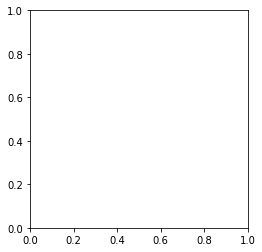

In [49]:
plt.imshow(x_test[6000])